In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
movies_df = pd.read_csv("C:/Users/FARHAN/Desktop/Quick IsCool/Bollywood - recomendation -2/indian movies.csv")

In [3]:
# Display the first few rows of the dataframe
movies_df.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


In [4]:
# Print the shape of the dataframe
print("Movies Dataframe:",movies_df.shape)

Movies Dataframe: (50602, 8)


In [5]:
# Display information about the dataframe including data types and non-null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [6]:
# Convert 'Votes' and 'Rating(10)' to numeric, forcing errors to NaN
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')
movies_df['Rating(10)'] = pd.to_numeric(movies_df['Rating(10)'], errors='coerce')

# Drop rows with NaN values in 'Votes' and 'Rating(10)' if necessary
movies_df = movies_df.dropna(subset=['Votes', 'Rating(10)'])

# Now calculate C and m
C = movies_df['Rating(10)'].mean()
m = movies_df['Votes'].quantile(0.90)


In [7]:
# Define a function to compute the weighted average rating
def weighted_average(x):
    R = x['Rating(10)']
    v = x['Votes']
    return (R * v + C * m) / (v + m)

In [8]:
# Apply the weighted average function to each row
# Print the dataframe with the new 'weighted_average' column
movies_df['weighted_average'] = movies_df.apply(weighted_average, axis=1)
print(movies_df)

               ID              Movie Name  Year Timing(min)  Rating(10)  \
3       tt0273405          Aag Aur Sholay  1987           -         2.2   
4       tt0049595                 Parivar  1956           -         7.4   
6       tt6597160  Jacqueline I Am Coming  2019     112 min         7.9   
9       tt0364628              Raktalekha  1992     175 min         6.3   
10      tt0364733       Veedevadandi Babu  1997     138 min         5.6   
...           ...                     ...   ...         ...         ...   
50584  tt14209540                      IV  2020      24 min         9.7   
50586   tt9277948                 Akshara  2021     136 min         6.5   
50587   tt0231191        Atal Jaler Ahwan  1962           -         6.6   
50591   tt0248201            Mudhal Thedi  1955     145 min         6.8   
50594   tt0073191        Jai Santoshi Maa  1975     145 min         6.3   

       Votes                              Genre   Language  weighted_average  
3       20.0        

In [9]:
# Sort the dataframe by 'weighted_average' in descending order
movie_sorted_ranking=movies_df.sort_values('weighted_average',ascending=False)
# Display the top 20 movies based on 'weighted_average'
movie_sorted_ranking[['Movie Name', 'Rating(10)', 'Votes', 'Genre', 'Language']].head(20)

,Movie Name,Rating(10),Votes,Genre,Language
44518,Dhuwan,9.4,985.0,"Action, Drama, Thriller",oriya
2492,Dhuwan,9.4,985.0,"Action, Drama, Thriller",urdu
43702,Alif,9.3,871.0,Drama,oriya
7979,Alif,9.3,871.0,Drama,urdu
8625,Meri Zaat Zarrae Benishan,9.1,952.0,Drama,urdu
30841,Meri Zaat Zarrae Benishan,9.1,952.0,Drama,oriya
18129,Pichhodu,9.5,612.0,Drama,telugu
36030,Fan,9.1,907.0,Drama,kannada
32198,Vaarthakal Ithuvare,9.6,481.0,Comedy,malayalam
44126,Nagara Haavu,8.9,943.0,"Drama, Musical",kannada


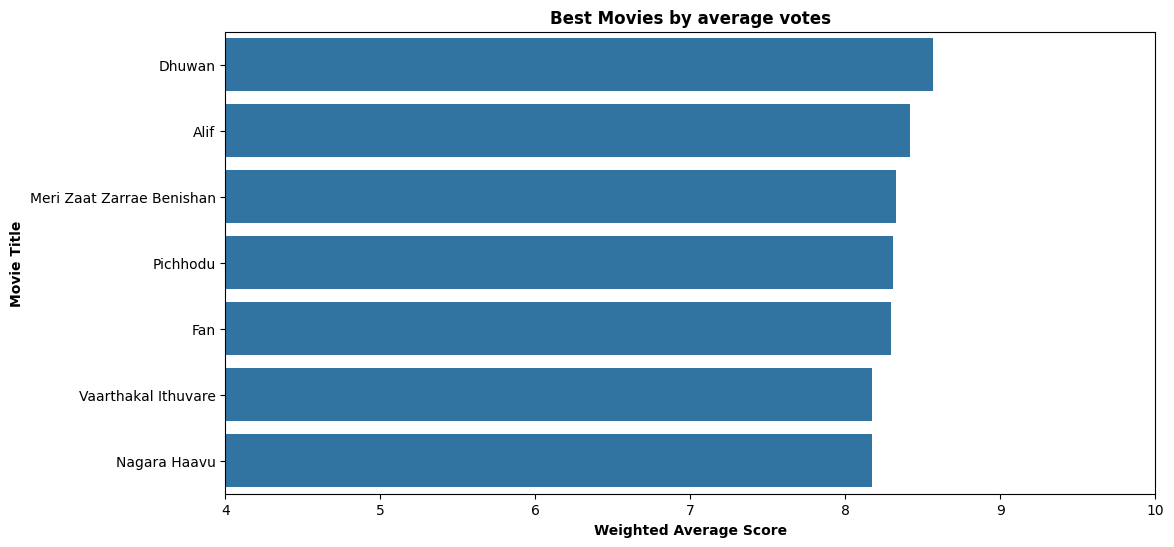

In [10]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['Movie Name'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

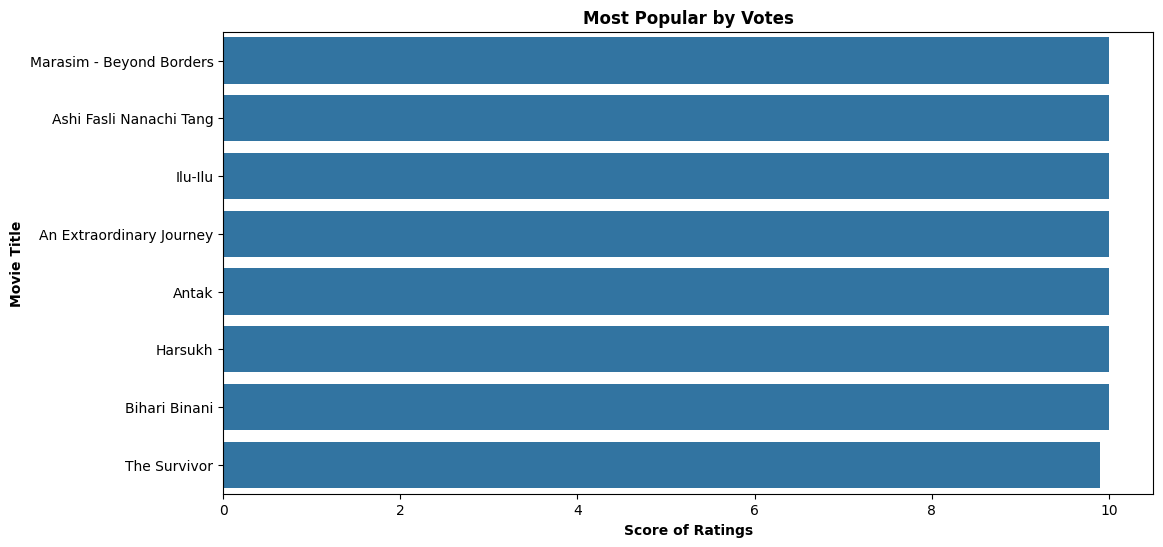

In [11]:
popularity=movie_sorted_ranking.sort_values('Rating(10)',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['Rating(10)'].head(10), y=popularity['Movie Name'].head(10))

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Ratings', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

In [12]:
# Import MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'weighted_average' and 'Rating(10)' columns
scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_df[['weighted_average','Rating(10)']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','Rating(10)'])
movie_normalized_df.head()

,weighted_average,Rating(10)
0,0.531527,0.133333
1,0.583404,0.711111
2,0.584616,0.766667
3,0.571688,0.588889
4,0.527789,0.511111


In [13]:
# Add the normalized columns to the original dataframe
movies_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [14]:
movies_df.head(1)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,weighted_average,normalized_weight_average,normalized_popularity
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20.0,-,urdu,6.002142,0.571688,0.588889


In [15]:
# Calculate the final score as the average of the normalized weighted average and popularity
movies_df['score'] = movies_df['normalized_weight_average'] * 0.5 + movies_df['normalized_popularity'] * 0.5

# Sort the dataframe by the final score in descending order
movies_scored_df = movies_df.sort_values(['score'], ascending=False)

# Display the top 20 movies based on the final score
movies_scored_df[['Movie Name', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,Movie Name,normalized_weight_average,normalized_popularity,score
18449,Panchavarnathatha,1.000000,0.933333,0.966667
3226,Panchalankurichi,0.972732,0.922222,0.947477
8338,Boni,0.926002,0.900000,0.913001
20567,Red Chillies,0.924063,0.900000,0.912032
2181,Mann Mayal,0.911542,0.866667,0.889105
9984,Gandharvam,0.891418,0.877778,0.884598
17325,Noy Number Bipod Shanket,0.893906,0.866667,0.880286
8444,Prema Natakam,0.878410,0.877778,0.878094
5202,Baat Ban Jaye,0.852414,0.888889,0.870652
10957,Kaal Abhirati,0.883211,0.844444,0.863828


C:\Users\FARHAN\AppData\Local\Temp\ipykernel_8476\3240434663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['Movie Name'].head(10), data=scored_df, palette='deep')


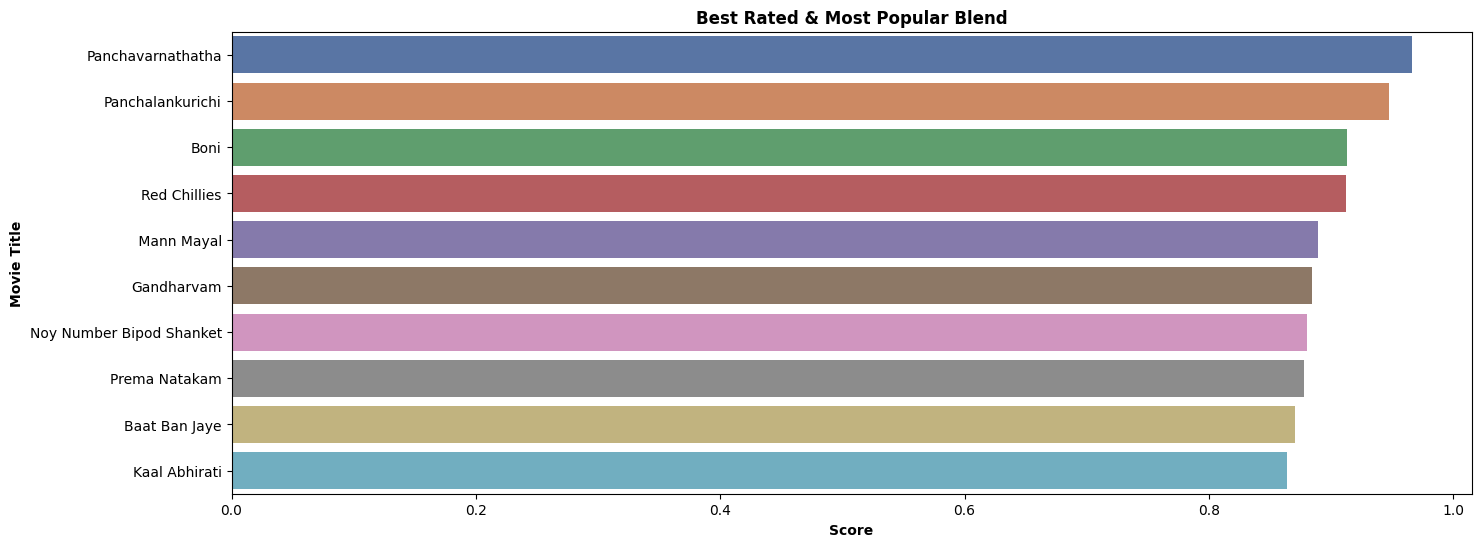

In [16]:
# Plot the top 10 movies by the final score
scored_df = movies_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['Movie Name'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('scored_movies.png')

In [17]:
# Display the 'Genre' column for the first few rows
movies_df.head()['Genre']

3                                     -
4     Comedy, Drama, Family            
6                     Drama            
9                     Drama            
10                   Comedy            
Name: Genre, dtype: object

In [18]:
# Import TfidfVectorizer for text processing
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with specified parameters
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Fill NaNs in 'Genre' with an empty string
movies_df['Genre'] = movies_df['Genre'].fillna('')

In [19]:
# Fit and transform the 'Genre' column
tfv_matrix = tfv.fit_transform(movies_df['Genre'])

In [20]:
tfv_matrix.shape

(20888, 369)

In [21]:
# Import sigmoid_kernel for similarity calculation
from sklearn.metrics.pairwise import sigmoid_kernel


# Compute the sigmoid kernel for the TF-IDF matrix
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [22]:
# Create a reverse mapping of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['Movie Name']).drop_duplicates()

In [23]:
indices

Movie Name
Aag Aur Sholay                3
Parivar                       4
Jacqueline I Am Coming        6
Raktalekha                    9
Veedevadandi Babu            10
                          ...  
IV                        50584
Akshara                   50586
Atal Jaler Ahwan          50587
Mudhal Thedi              50591
Jai Santoshi Maa          50594
Length: 20888, dtype: int64

In [24]:
# Test with a specific movie to get its index and similarity scores
idx = indices["Aag Aur Sholay"]

In [25]:
sig_scores = list(enumerate(sig[idx]))
print(sig_scores)

[(0, 0.7615941559557649), (1, 0.7617835428531303), (2, 0.7627299508090989), (3, 0.7627299508090989), (4, 0.7615941559557649), (5, 0.7615941559557649), (6, 0.7627299508090989), (7, 0.7615941559557649), (8, 0.7617236226880961), (9, 0.7618148138625765), (10, 0.7615941559557649), (11, 0.7615941559557649), (12, 0.7615941559557649), (13, 0.7617935868257897), (14, 0.7619807844283035), (15, 0.7615941559557649), (16, 0.7615941559557649), (17, 0.7615941559557649), (18, 0.7618625519156743), (19, 0.76173181270031), (20, 0.7615941559557649), (21, 0.7617956264801115), (22, 0.7617226703555087), (23, 0.7627299508090989), (24, 0.7615941559557649), (25, 0.7617770750261377), (26, 0.7615941559557649), (27, 0.7627299508090989), (28, 0.7617619537479832), (29, 0.7615941559557649), (30, 0.7627299508090989), (31, 0.7615941559557649), (32, 0.7615941559557649), (33, 0.7619807844283035), (34, 0.7619571910611819), (35, 0.7615941559557649), (36, 0.7627299508090989), (37, 0.7615941559557649), (38, 0.7615941559557649

In [26]:
# Define a function to recommend movies based on similarity scores
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies based on similarity scores
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Get Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Return Top 10 most similar movies
    return movies_df['Movie Name'].iloc[movie_indices]

In [27]:
# Test the recommendation function with a specific movie
give_rec('Puttadi Bomma')

72                   Apnapan
156    Palkon Ki Chhaon Mein
224                Lover Boy
442        Ravoyi Chandamama
578               Mann Mayal
582       Raaste Kaa Patthar
584      Pyaar Hi Pyaar Mein
644              Prem Geet 2
716       Melnattu Marumagal
728    A Gift of Love: Sifar
Name: Movie Name, dtype: object

In [28]:
give_rec('Baat Ban Jaye')

9                      Raktalekha
15        Amman Koil Kizhakkaalae
56                 Dobara Phir Se
64                   Coffee Bloom
67                     Olappeeppi
82                           Beru
94                         Britto
141    Mullamottum Munthiricharum
168                  Janma Bhoomi
179                     Talentime
Name: Movie Name, dtype: object

In [29]:
import pickle

# Save the model
with open('bollywood_recommendation_model.pkl', 'wb') as f:
    pickle.dump(sig, f)